In [ ]:
import numpy as np
import pandas as pd
import csv
import pickle
import os
import scipy
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
import seaborn as sns
from keras.utils import np_utils
from keras.layers import LSTM, BatchNormalization
import tensorflow
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
import gc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# enable gpu
from keras import backend as K
K._get_available_gpus()

['/device:GPU:0']

In [ ]:
DataPath=  '/content/drive/MyDrive/Colab Notebooks/pattern/lab4/data/RML2016.10b.dat' #'/content/drive/MyDrive/ModulationClassification/RML2016.10b.dat'

In [ ]:
pickle_in = open(DataPath,"rb")
data = pickle.load(pickle_in, encoding="bytes")

In [ ]:
def load_data(data):
  s = np.empty((0,128,2))
  l=np.array([])
  for key in data.keys():
    # load samples
    x,y=key
    x = x.decode('ascii')
    samples = np.array(data.get(key)).transpose(0, 2, 1)
    # create labels
    labels = np.repeat(x+'_'+str(y),samples.shape[0])
    l=np.concatenate([l,labels])
    s=np.vstack((s,samples))
    print('key',key)
    print("samples:",samples.shape)
    print('labels',labels.shape)
  return l,s,data.keys()
  

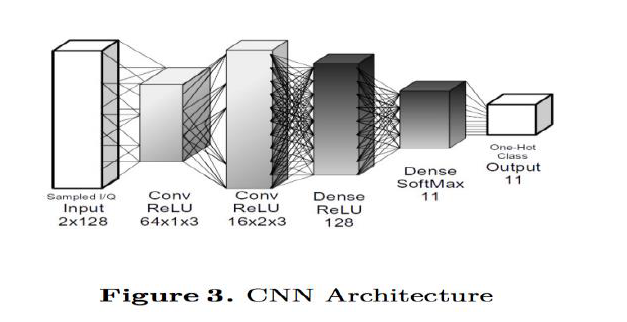

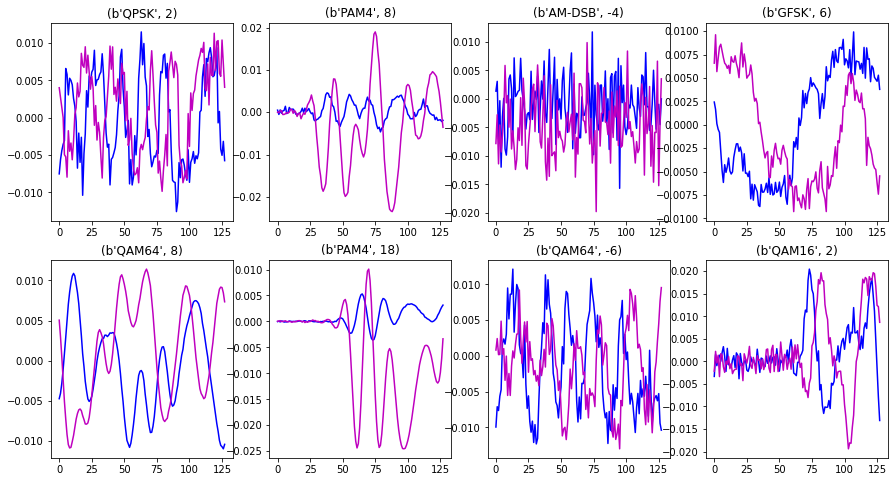



**********************************




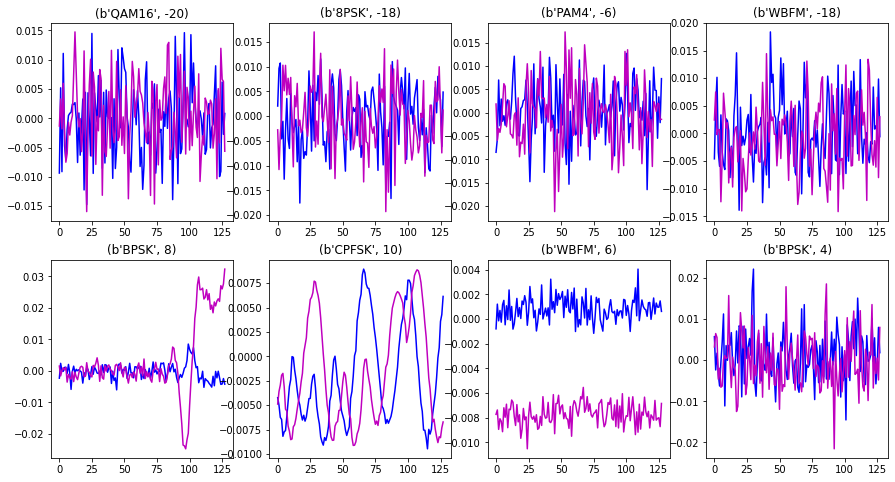



**********************************




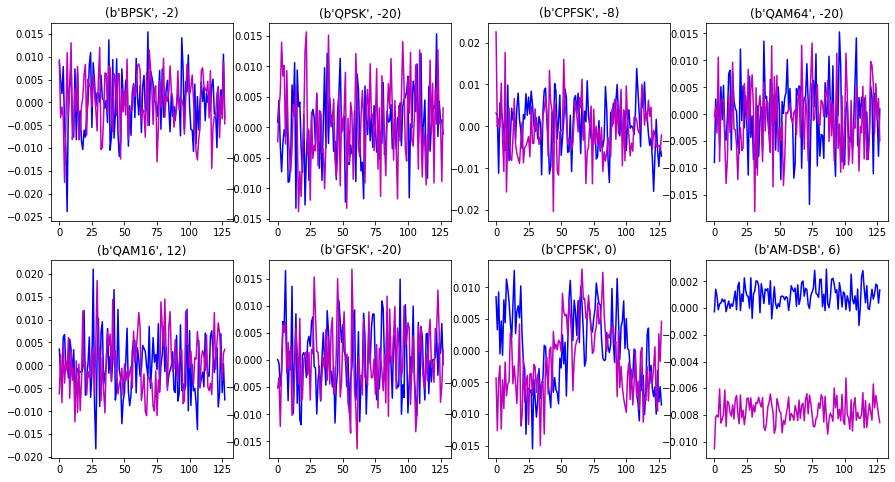



**********************************




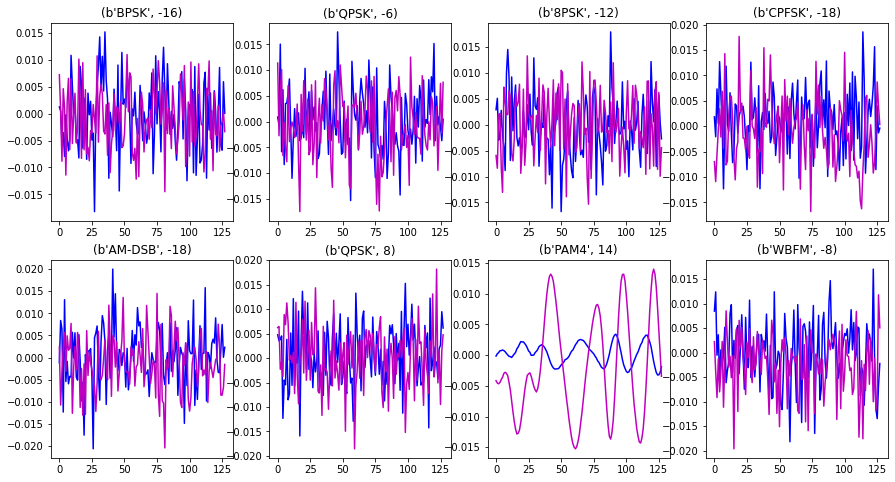



**********************************




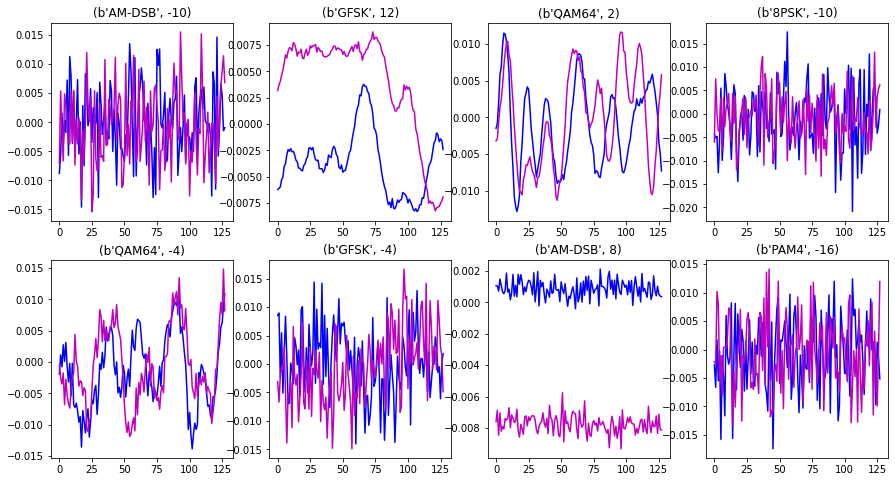



**********************************




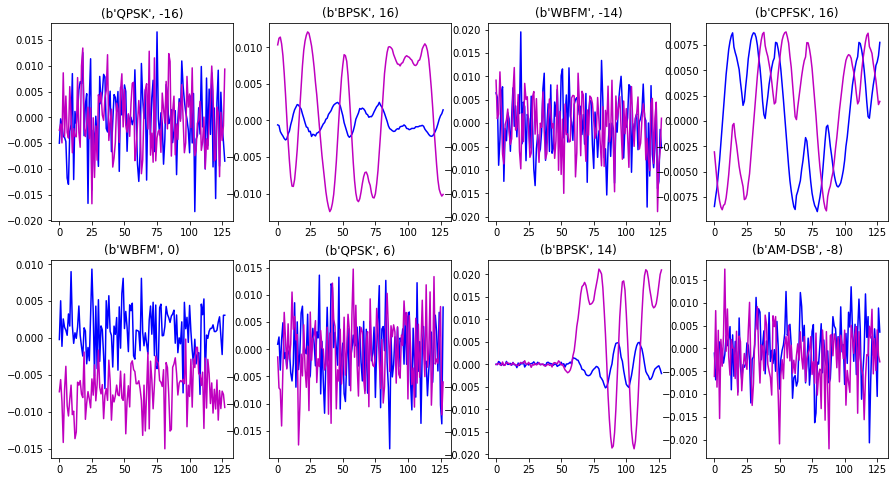



**********************************




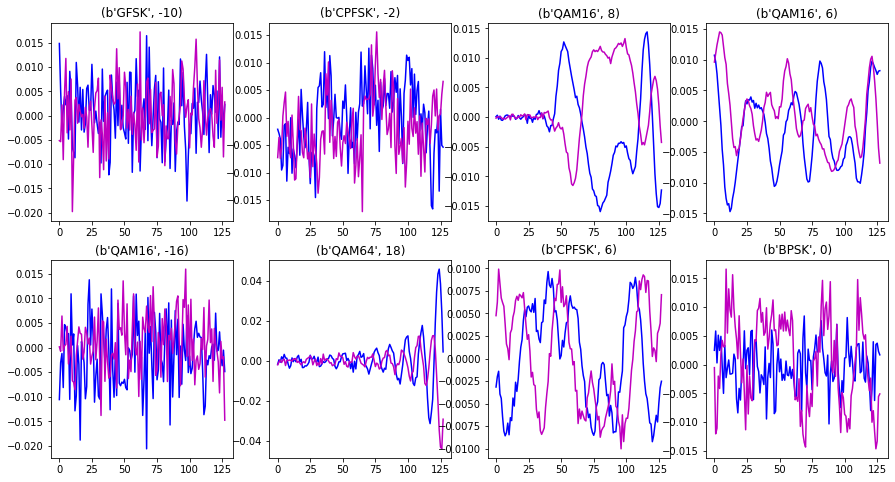



**********************************




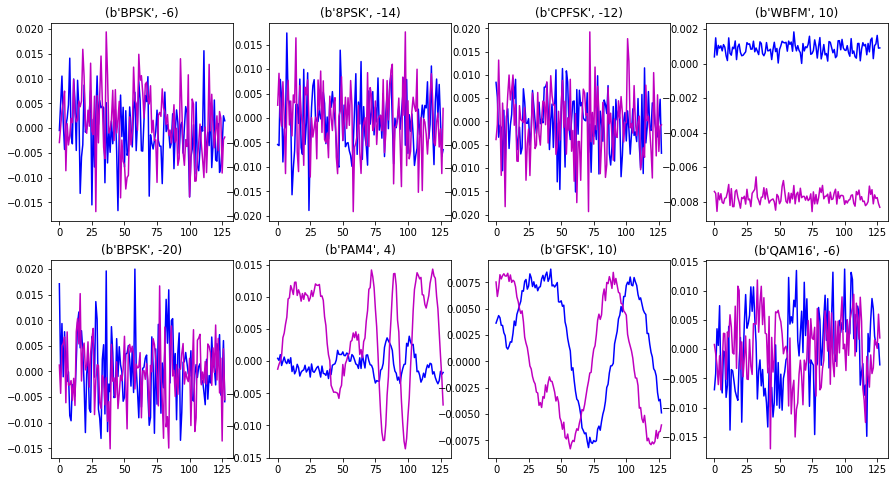



**********************************




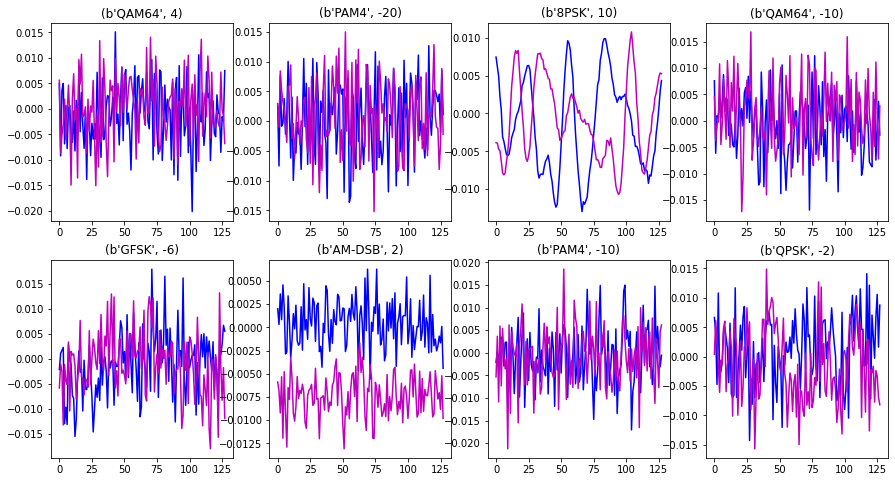



**********************************




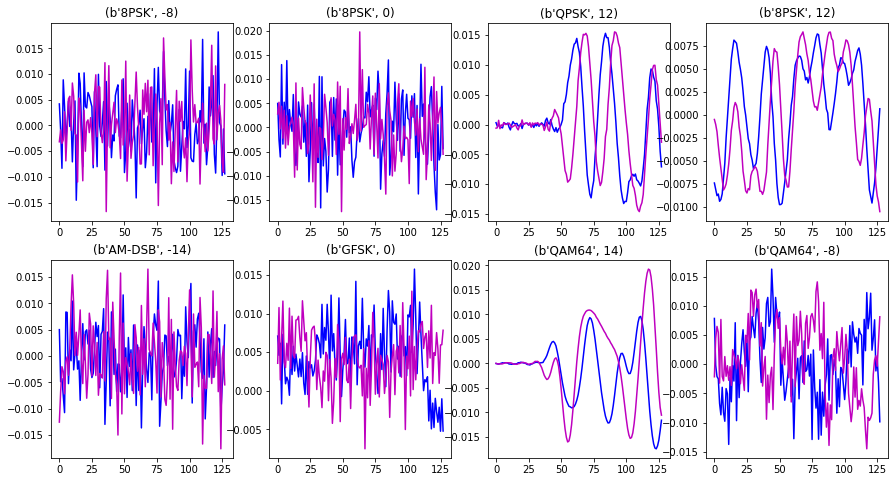



**********************************




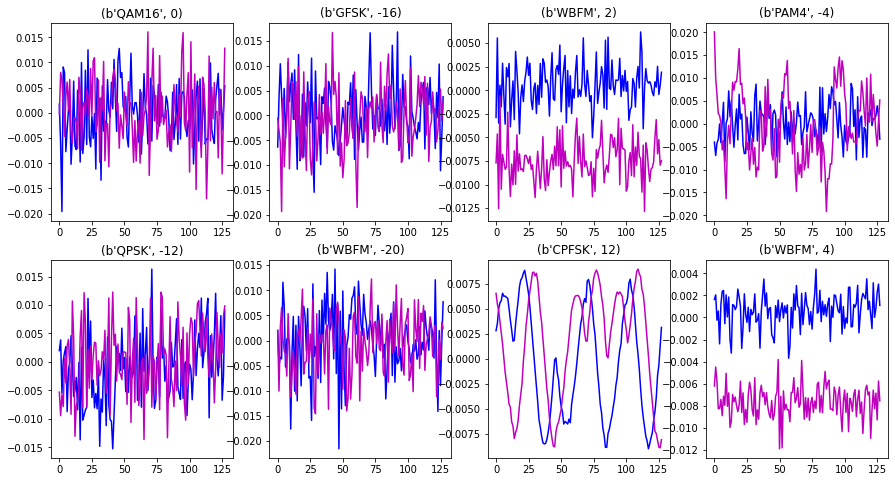



**********************************




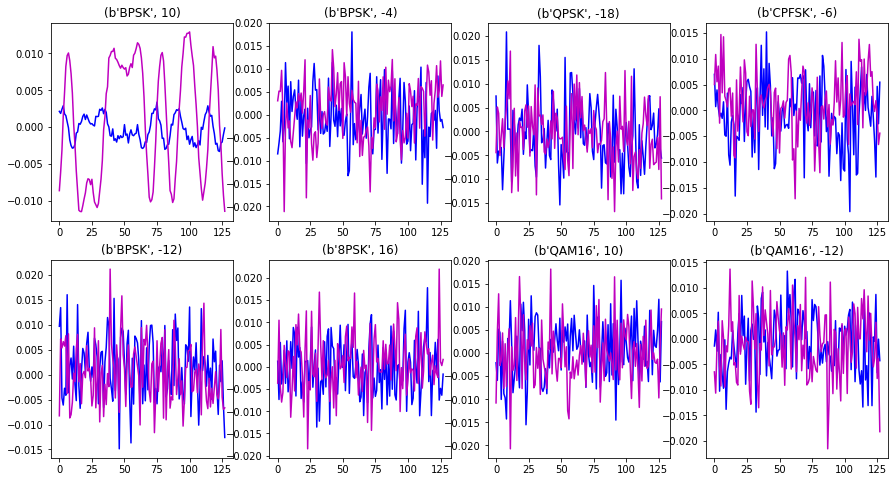



**********************************




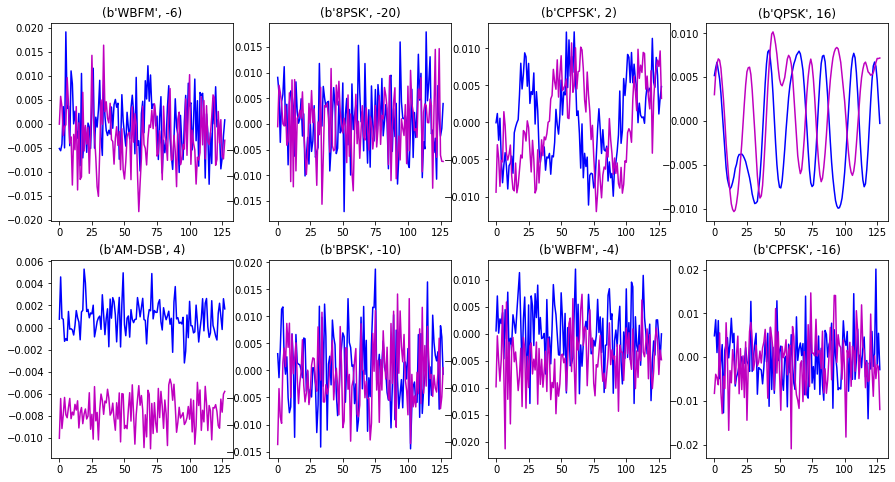



**********************************




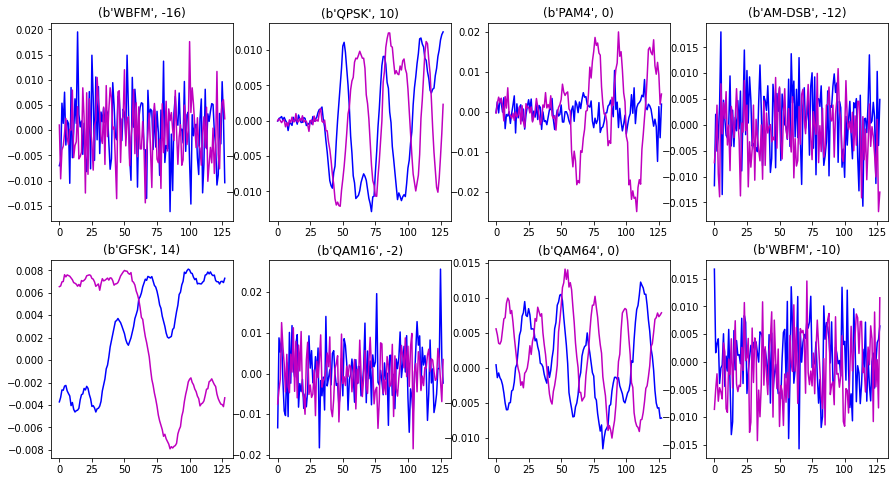



**********************************




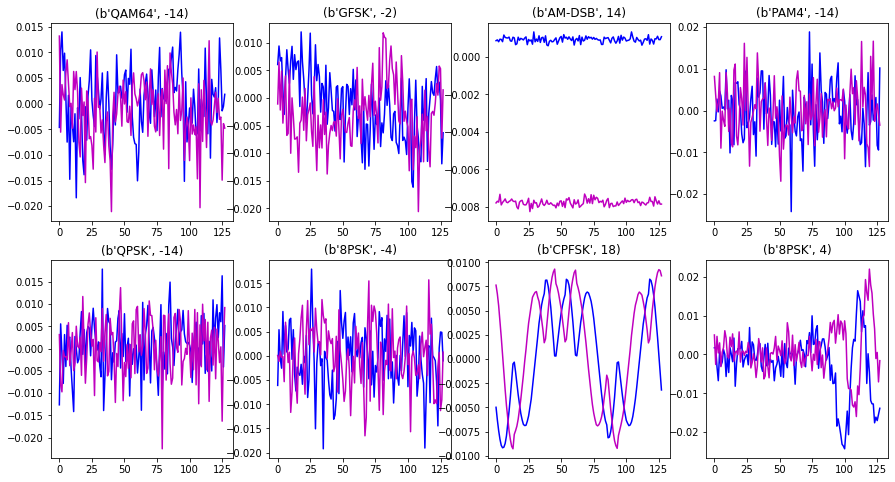



**********************************




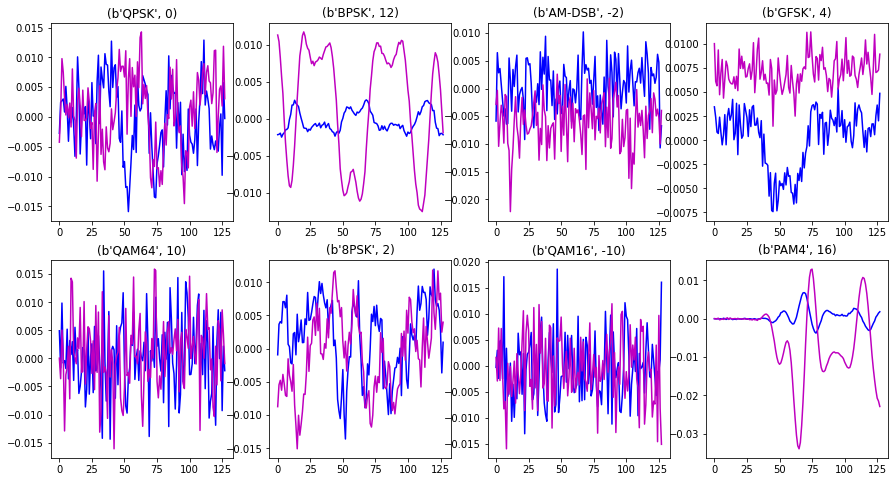



**********************************




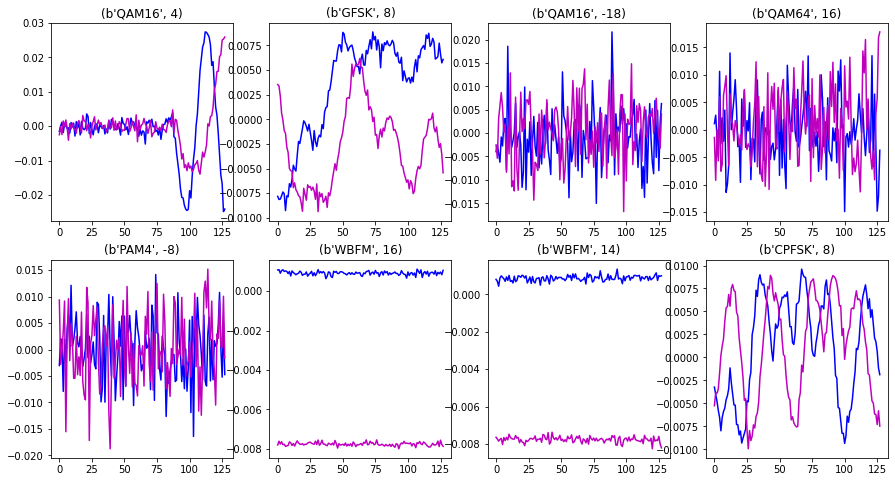



**********************************




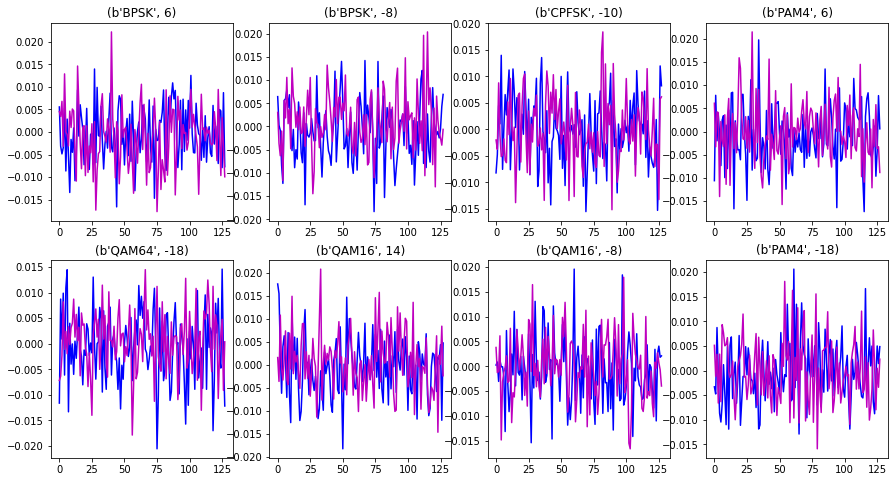



**********************************




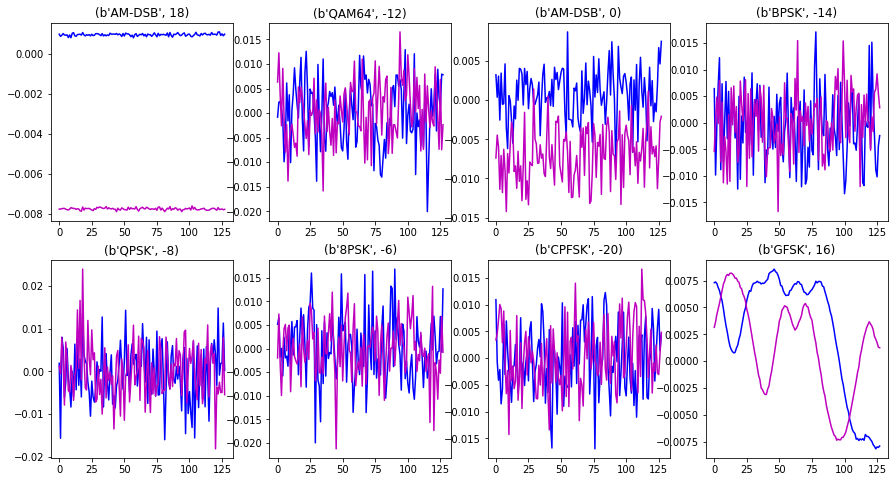



**********************************




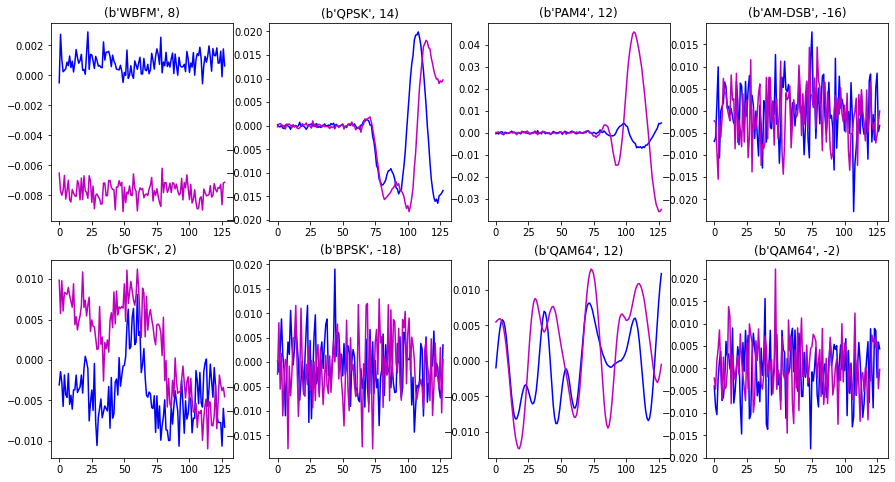



**********************************




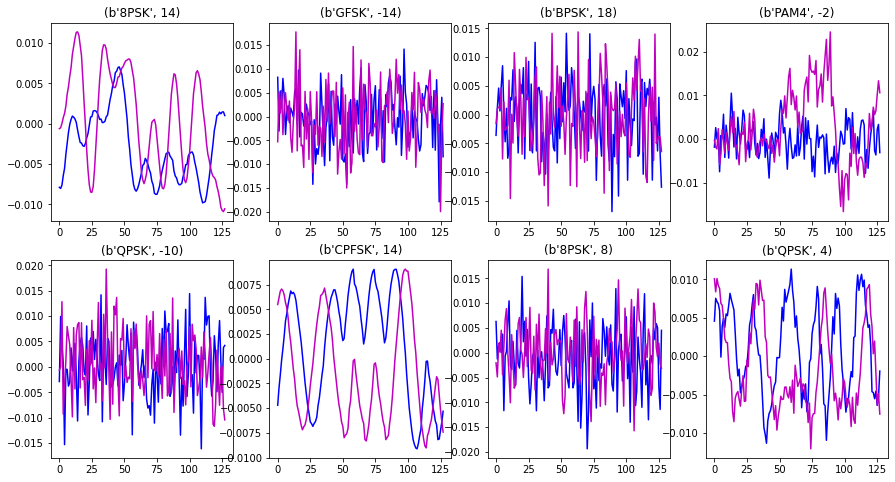



**********************************




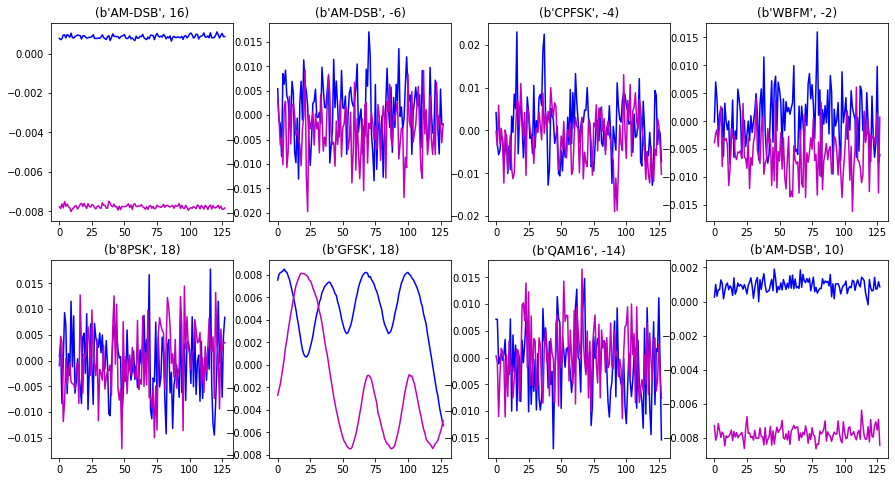



**********************************




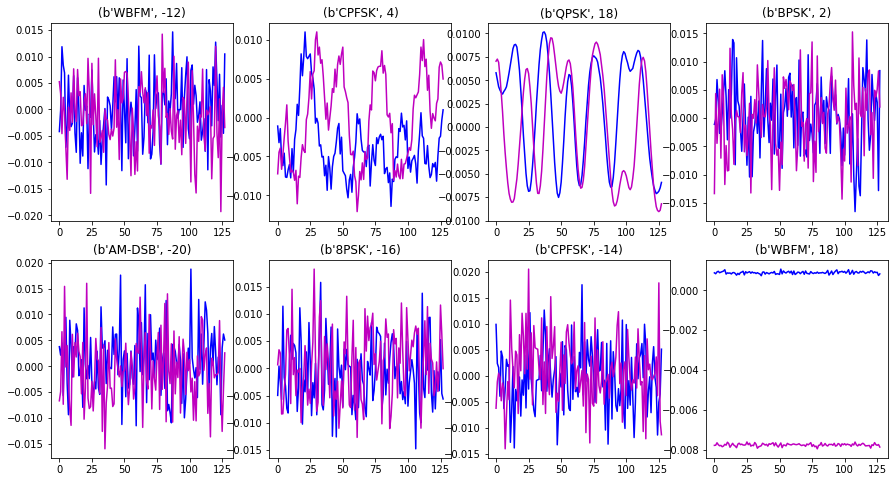



**********************************




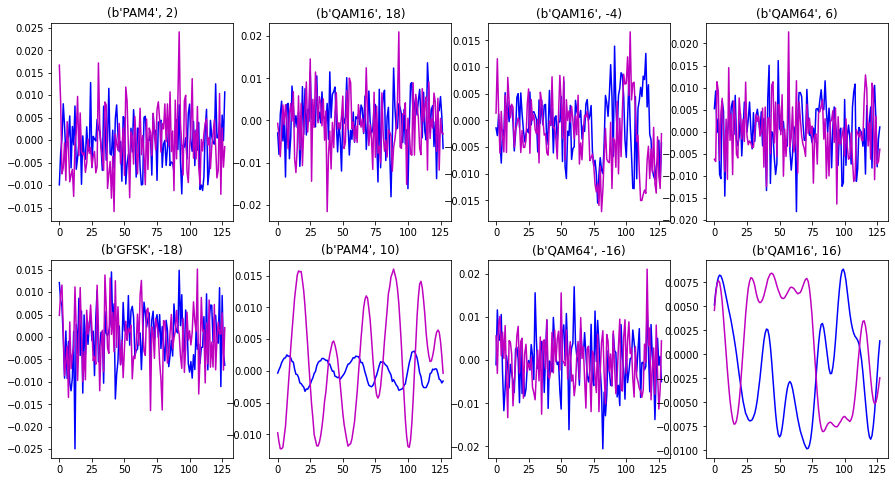



**********************************




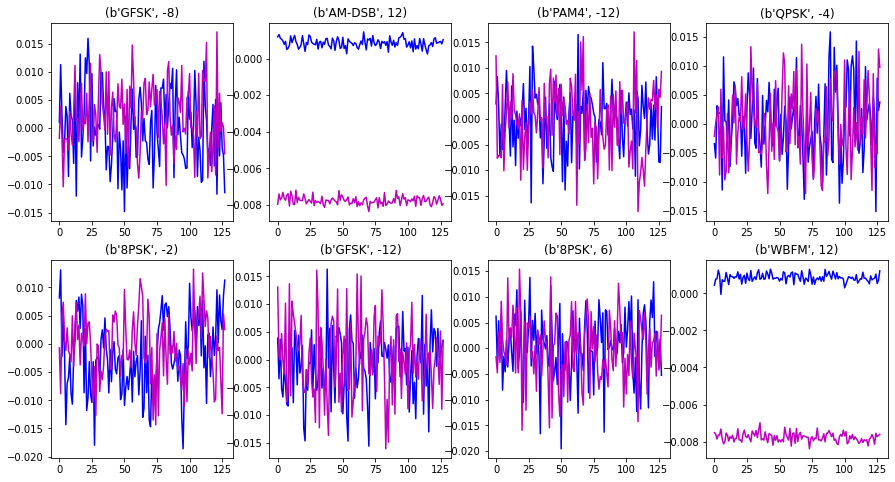



**********************************




In [ ]:
# Visualize data
def visualize(data)
  k =[]

  for key in data.keys():
    y1 = DataFrame(data.get(key)[0][:][0])
    y2=DataFrame(data.get(key)[0][:][1])
    k.append([y1, y2, str(key)])
    if len(k)%8==0:
      figure, axis = plt.subplots(2, 4,figsize=(15,8))
      for i in range(8):
        axis[i//4,i%4].plot(k[i][0],'b')
        axis[i//4,i%4].plot(k[i][1],'m')
        axis[i//4,i%4].set_title(k[i][2])

      plt.show()
      k=[]
      print("\n\n**********************************\n\n")


In [ ]:
def first_drev(data):
  drev = np.empty((0,128,2))
  for i in range(200):
    print(i)
    tmp = np.gradient(data[i*6000:i*6000+6000][:][:],axis=1)
    drev=np.vstack((drev,tmp))
    del tmp
  return drev


In [ ]:
def integral(data):
  data=np.pad(data, [(0, 0),(0,0),(0,1)], 'constant')
  integral = np.empty((0,128,2))
  for i in range(200):
    print(i)
    tmp = scipy.integrate.cumtrapz(data[i*6000:i*6000+6000][:][:],dx=1)
    integral=np.vstack((integral,tmp))
    del tmp
  return integral

In [ ]:
# make combination and save to path
def combine_and_save(d1,d2,path):
  d = concatenate((d1,d2),axis=2)
  np.save(d,path)
  return d

In [ ]:
def split_tuple(labels):
  label, snr = map(list, zip(*(x.split('_') for x in labels)))
  label,snr=np.array(label),np.array(snr)
  return label,snr

In [ ]:
def create_model():
  number_of_channels = 2
  cnn_model = Sequential()
  
  cnn_model.add(Conv2D(64, (1,3),padding='same',input_shape=(128, number_of_channels,1), activation='relu'))

  cnn_model.add(Conv2D(16, (2,3),padding='same',activation='relu'))

  cnn_model.add(BatchNormalization())
  
  cnn_model.add(Flatten())
  cnn_model.add(Dropout(0.5))

  cnn_model.add(Dense(128, activation ='relu'))

  cnn_model.add(Dense(10, activation ='softmax'))

  

  return cnn_model

In [ ]:
labels, samples,classes = load_data(data)

key (b'QPSK', 2)
samples: (6000, 128, 2)
labels (6000,)
key (b'PAM4', 8)
samples: (6000, 128, 2)
labels (6000,)
key (b'AM-DSB', -4)
samples: (6000, 128, 2)
labels (6000,)
key (b'GFSK', 6)
samples: (6000, 128, 2)
labels (6000,)
key (b'QAM64', 8)
samples: (6000, 128, 2)
labels (6000,)
key (b'PAM4', 18)
samples: (6000, 128, 2)
labels (6000,)
key (b'QAM64', -6)
samples: (6000, 128, 2)
labels (6000,)
key (b'QAM16', 2)
samples: (6000, 128, 2)
labels (6000,)
key (b'QAM16', -20)
samples: (6000, 128, 2)
labels (6000,)
key (b'8PSK', -18)
samples: (6000, 128, 2)
labels (6000,)
key (b'PAM4', -6)
samples: (6000, 128, 2)
labels (6000,)
key (b'WBFM', -18)
samples: (6000, 128, 2)
labels (6000,)
key (b'BPSK', 8)
samples: (6000, 128, 2)
labels (6000,)
key (b'CPFSK', 10)
samples: (6000, 128, 2)
labels (6000,)
key (b'WBFM', 6)
samples: (6000, 128, 2)
labels (6000,)
key (b'BPSK', 4)
samples: (6000, 128, 2)
labels (6000,)
key (b'BPSK', -2)
samples: (6000, 128, 2)
labels (6000,)
key (b'QPSK', -20)
samples: (

In [ ]:
# to encode the labels
lb = LabelEncoder()

# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(samples, labels,test_size=0.3, random_state=1 ,stratify=labels)
del samples
del labels
# take 5% of training set for validation 
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.05, random_state=1,stratify=y_train)

y_train,snr_train = split_tuple(y_train)
y_test,snr_test = split_tuple(y_test)
y_val,snr_val=split_tuple(y_val)

# encode labels
y_train_lb = np_utils.to_categorical(lb.fit_transform(y_train))
y_val_lb = np_utils.to_categorical(lb.fit_transform(y_val))

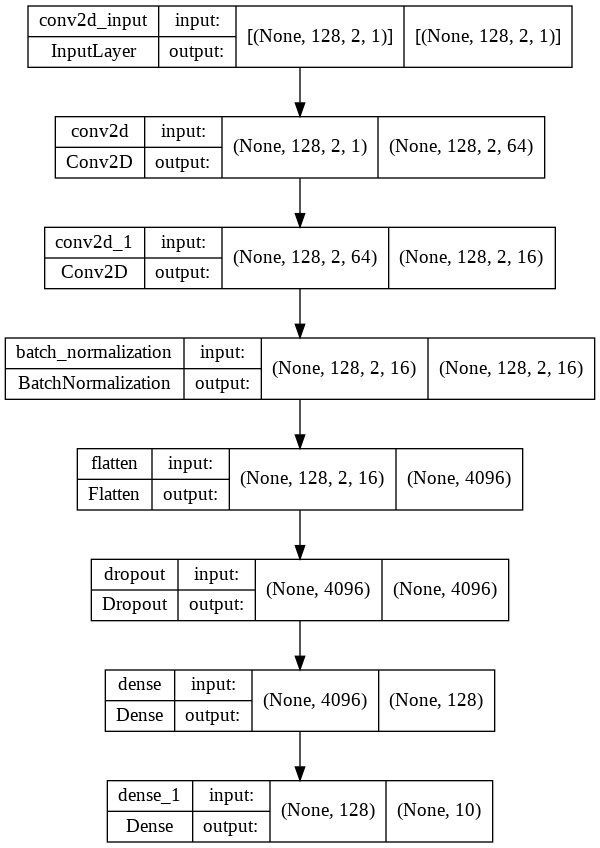

In [ ]:
# create model
model = create_model()
model.compile(loss = 'categorical_crossentropy',optimizer = 'Adam', metrics = ['accuracy'])

# Save an image of the model's architecture to a file
plot_model(model, to_file='Feed Forward NN.png', show_shapes=True, show_layer_names=True)

Learning rate: 0.1
Epoch 1/50
24938/24938 [==============================] - 108s 4ms/step - loss: 2.3684 - accuracy: 0.0997 - val_loss: 2.3292 - val_accuracy: 0.1000
Epoch 2/50
24938/24938 [==============================] - 94s 4ms/step - loss: 2.3154 - accuracy: 0.0995 - val_loss: 2.3206 - val_accuracy: 0.1000
Epoch 3/50
24938/24938 [==============================] - 94s 4ms/step - loss: 2.3154 - accuracy: 0.0999 - val_loss: 2.3152 - val_accuracy: 0.1000
Epoch 4/50
24938/24938 [==============================] - 93s 4ms/step - loss: 2.3151 - accuracy: 0.1001 - val_loss: 2.3325 - val_accuracy: 0.1000
Epoch 5/50
24938/24938 [==============================] - 96s 4ms/step - loss: 2.3154 - accuracy: 0.0998 - val_loss: 2.3186 - val_accuracy: 0.1000
Epoch 6/50
24938/24938 [==============================] - 94s 4ms/step - loss: 2.3154 - accuracy: 0.1000 - val_loss: 2.3132 - val_accuracy: 0.1000


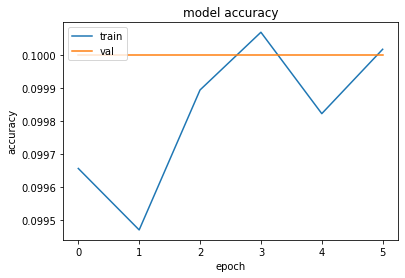

**************************************************


Learning rate: 0.01
Epoch 1/50
24938/24938 [==============================] - 93s 4ms/step - loss: 2.3049 - accuracy: 0.0992 - val_loss: 2.3039 - val_accuracy: 0.1000
Epoch 2/50
24938/24938 [==============================] - 93s 4ms/step - loss: 2.3039 - accuracy: 0.1003 - val_loss: 2.3037 - val_accuracy: 0.1000
Epoch 3/50
24938/24938 [==============================] - 95s 4ms/step - loss: 2.3039 - accuracy: 0.0999 - val_loss: 2.3033 - val_accuracy: 0.1000
Epoch 4/50
24938/24938 [==============================] - 95s 4ms/step - loss: 2.3039 - accuracy: 0.1000 - val_loss: 2.3049 - val_accuracy: 0.1000
Epoch 5/50
24938/24938 [==============================] - 94s 4ms/step - loss: 2.3039 - accuracy: 0.1002 - val_loss: 2.3044 - val_accuracy: 0.1000
Epoch 6/50
24938/24938 [==============================] - 95s 4ms/step - loss: 2.3039 - accuracy: 0.1000 - val_loss: 2.3036 - val_accuracy: 0.1000


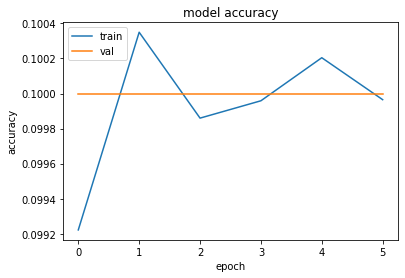

**************************************************


Learning rate: 0.001
Epoch 1/50
24938/24938 [==============================] - 94s 4ms/step - loss: 1.7098 - accuracy: 0.3221 - val_loss: 1.9338 - val_accuracy: 0.2684
Epoch 2/50
24938/24938 [==============================] - 94s 4ms/step - loss: 1.6380 - accuracy: 0.3486 - val_loss: 2.7980 - val_accuracy: 0.2754
Epoch 3/50
24938/24938 [==============================] - 94s 4ms/step - loss: 1.6153 - accuracy: 0.3578 - val_loss: 4.3213 - val_accuracy: 0.1596
Epoch 4/50
24938/24938 [==============================] - 96s 4ms/step - loss: 1.6029 - accuracy: 0.3627 - val_loss: 2.0190 - val_accuracy: 0.3103
Epoch 5/50
24938/24938 [==============================] - 95s 4ms/step - loss: 1.5932 - accuracy: 0.3662 - val_loss: 58.5529 - val_accuracy: 0.1000
Epoch 6/50
24938/24938 [==============================] - 96s 4ms/step - loss: 1.5869 - accuracy: 0.3694 - val_loss: 6.8427 - val_accuracy: 0.1966
Epoch 7/50
24938/24938 [===================

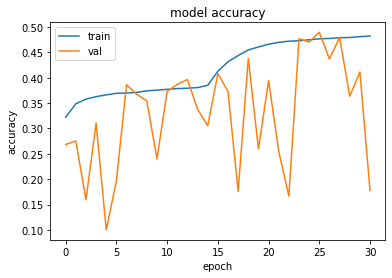

**************************************************


Learning rate: 0.0001
Epoch 1/50
24938/24938 [==============================] - 98s 4ms/step - loss: 1.5841 - accuracy: 0.3652 - val_loss: 2.6003 - val_accuracy: 0.2399
Epoch 2/50
24938/24938 [==============================] - 97s 4ms/step - loss: 1.3052 - accuracy: 0.4650 - val_loss: 1.2092 - val_accuracy: 0.5014
Epoch 3/50
24938/24938 [==============================] - 94s 4ms/step - loss: 1.2353 - accuracy: 0.4904 - val_loss: 1.3111 - val_accuracy: 0.4710
Epoch 4/50
24938/24938 [==============================] - 95s 4ms/step - loss: 1.1856 - accuracy: 0.5102 - val_loss: 1.1346 - val_accuracy: 0.5276
Epoch 5/50
24938/24938 [==============================] - 96s 4ms/step - loss: 1.1537 - accuracy: 0.5217 - val_loss: 1.6604 - val_accuracy: 0.4249
Epoch 6/50
24938/24938 [==============================] - 97s 4ms/step - loss: 1.1296 - accuracy: 0.5295 - val_loss: 1.1677 - val_accuracy: 0.5089
Epoch 7/50
24938/24938 [===================

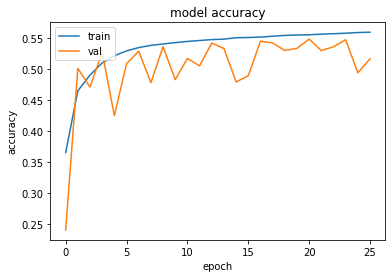

**************************************************


Learning rate: 1e-05
Epoch 1/50
24938/24938 [==============================] - 100s 4ms/step - loss: 2.0024 - accuracy: 0.2276 - val_loss: 1.8130 - val_accuracy: 0.2835
Epoch 2/50
24938/24938 [==============================] - 96s 4ms/step - loss: 1.7628 - accuracy: 0.2971 - val_loss: 1.6642 - val_accuracy: 0.3353
Epoch 3/50
24938/24938 [==============================] - 99s 4ms/step - loss: 1.6614 - accuracy: 0.3361 - val_loss: 1.5694 - val_accuracy: 0.3808
Epoch 4/50
24938/24938 [==============================] - 101s 4ms/step - loss: 1.5864 - accuracy: 0.3691 - val_loss: 1.5046 - val_accuracy: 0.4144
Epoch 5/50
24938/24938 [==============================] - 97s 4ms/step - loss: 1.5259 - accuracy: 0.3955 - val_loss: 1.4393 - val_accuracy: 0.4366
Epoch 6/50
24938/24938 [==============================] - 100s 4ms/step - loss: 1.4787 - accuracy: 0.4127 - val_loss: 1.3999 - val_accuracy: 0.4475
Epoch 7/50
24938/24938 [=================

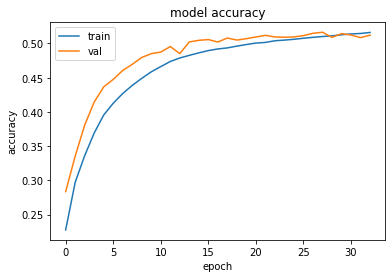

**************************************************


Learning rate: 1e-06
Epoch 1/50
24938/24938 [==============================] - 99s 4ms/step - loss: 2.1873 - accuracy: 0.1595 - val_loss: 2.1307 - val_accuracy: 0.1748
Epoch 2/50
24938/24938 [==============================] - 99s 4ms/step - loss: 2.1200 - accuracy: 0.1810 - val_loss: 2.1067 - val_accuracy: 0.1975
Epoch 3/50
24938/24938 [==============================] - 99s 4ms/step - loss: 2.0978 - accuracy: 0.1991 - val_loss: 2.0827 - val_accuracy: 0.2157
Epoch 4/50
24938/24938 [==============================] - 98s 4ms/step - loss: 2.0736 - accuracy: 0.2131 - val_loss: 2.0554 - val_accuracy: 0.2261
Epoch 5/50
24938/24938 [==============================] - 97s 4ms/step - loss: 2.0459 - accuracy: 0.2233 - val_loss: 2.0231 - val_accuracy: 0.2337
Epoch 6/50
24938/24938 [==============================] - 96s 4ms/step - loss: 2.0148 - accuracy: 0.2332 - val_loss: 1.9874 - val_accuracy: 0.2439
Epoch 7/50
24938/24938 [====================

KeyboardInterrupt: ignored

In [ ]:
#tuning on different learning rates
gc.collect()
rates = [1e-1,1e-2,1e-3,1e-4,1e-5,1e-6]
epochs = 50
path = '/content/drive/MyDrive/Colab Notebooks/pattern/lab4/data/cnn/'
checkpoint_filepath = path+'checkpoint_drop_integral_cnn'
model_checkpoint_callback = tensorflow.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
for lr in rates:
  print("Learning rate:",lr)
  model = create_model()
  callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)
  opt = tensorflow.keras.optimizers.Adam(learning_rate=lr)
  model.compile(loss = 'categorical_crossentropy',optimizer = opt, metrics = ['accuracy'])

  # train model
  cnn_results = model.fit(x_train, y_train_lb,
                  epochs = epochs,
                  verbose = 1,
                  validation_data = (x_val, y_val_lb),callbacks=[callback,model_checkpoint_callback])
  # Plot model accuracy over ephocs
  plt.plot(cnn_results.history['accuracy'])
  plt.plot(cnn_results.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.savefig(path+'drop_integral_cnn'+f'lr_{str(lr)}.png')
  plt.show()
  print("**************************************************\n\n")
  gc.collect()


Epoch 1/50
24938/24938 [==============================] - 109s 4ms/step - loss: 1.9953 - accuracy: 0.2329 - val_loss: 1.8270 - val_accuracy: 0.2794
Epoch 2/50
24938/24938 [==============================] - 99s 4ms/step - loss: 1.7761 - accuracy: 0.2929 - val_loss: 1.6916 - val_accuracy: 0.3243
Epoch 3/50
24938/24938 [==============================] - 99s 4ms/step - loss: 1.6870 - accuracy: 0.3271 - val_loss: 1.6176 - val_accuracy: 0.3619
Epoch 4/50
24938/24938 [==============================] - 98s 4ms/step - loss: 1.6257 - accuracy: 0.3546 - val_loss: 1.5545 - val_accuracy: 0.3940
Epoch 5/50
24938/24938 [==============================] - 98s 4ms/step - loss: 1.5682 - accuracy: 0.3798 - val_loss: 1.5099 - val_accuracy: 0.4141
Epoch 6/50
24938/24938 [==============================] - 96s 4ms/step - loss: 1.5148 - accuracy: 0.4010 - val_loss: 1.4366 - val_accuracy: 0.4377
Epoch 7/50
24938/24938 [==============================] - 98s 4ms/step - loss: 1.4625 - accuracy: 0.4193 - val_loss: 

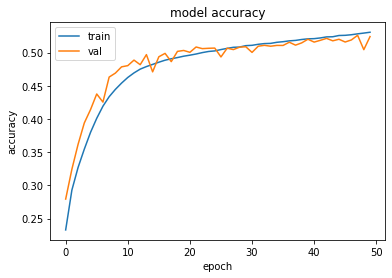

4821

In [ ]:
#training on best learning rate which is 1e-5
gc.collect()
model = create_model()
opt = tensorflow.keras.optimizers.Adam(learning_rate=1e-5)

model.compile(loss = 'categorical_crossentropy',optimizer = opt, metrics = ['accuracy'])

# train model
cnn_results = model.fit(x_train, y_train_lb,
                  epochs = 50,
                  verbose = 1,
                  validation_data = (x_val, y_val_lb))
# Plot model accuracy over ephocs
plt.plot(cnn_results.history['accuracy'])
plt.plot(cnn_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
gc.collect()

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/pattern/lab4/data/cnn/raw_model.h5')
y_test_lb = np_utils.to_categorical(lb.fit_transform(y_test))

score = model.evaluate(x_test, y_test_lb, verbose=0)
print("Testing Accuracy: ", score[1])

Testing Accuracy:  0.5220555663108826


In [ ]:
del x_train
del y_train
del y_val
del x_val
del y_train_lb
del y_val_lb
gc.collect()

701

In [ ]:
# to get confusion matrix

y_test_classes = y_test_lb.argmax(1)
y_predicted = model.predict(x_test)
y_pred_classes = np.argmax(y_predicted,axis=1)
classes = np.load('/content/drive/MyDrive/Colab Notebooks/pattern/lab4/classes.npy')


In [ ]:
# get confusion matrix
confusion_matrix1 = confusion_matrix(y_true= y_test_classes, y_pred=y_pred_classes)
classes = np.array([x[0] for x in classes])
classes=np.unique(classes)
print(classes)
#Add labels to confusion matrix
confusion_matrix1 = pd.DataFrame(confusion_matrix1, columns=list(classes), index=list(classes))

print("The rows represents the true values or observations")
print("The columns respresent the model's predictions")

#Print confusion matrix results
confusion_matrix1

[b'8PSK' b'AM-DSB' b'BPSK' b'CPFSK' b'GFSK' b'PAM4' b'QAM16' b'QAM64'
 b'QPSK' b'WBFM']
The rows represents the true values or observations
The columns respresent the model's predictions


b'8PSK'  b'AM-DSB'  b'BPSK'  b'CPFSK'  b'GFSK'  b'PAM4'  b'QAM16'  \
b'8PSK'      16142       1178     1889      2983     2478      325      1656   
b'AM-DSB'     1321      22653      917      1302     1483      114        27   
b'BPSK'       2650       1183    21625      2424     2103     2407       117   
b'CPFSK'      2512       1181     1592     23674     2852      261       269   
b'GFSK'       1903       1523     1284      2193    24726      167        54   
b'PAM4'       1986        844     2768      1932     1619    24100        86   
b'QAM16'      2795        740     1194      2118     1710      349      4040   
b'QAM64'      2037        477      860      1483     1274      326      3330   
b'QPSK'       9674       1157     1847      2943     2496      351      1368   
b'WBFM'       1377      14994      989      1358     2101       93        35   

           b'QAM64'  b'QPSK'  b'WBFM'  
b'8PSK'        1900     6308     1141  
b'AM-DSB'         5     1124     7054  
b'BPSK'          42     2328     1121  
b'CPFSK'        189     2251     1219  
b'GFSK'          23     1502     2625  
b'PAM4'          49     1760      856  
b'QAM16'      19758     2576      720  
b'QAM64'      23605     2101      507  
b'QPSK'        1544    13505     1115  
b'WBFM'           2     1181    13870

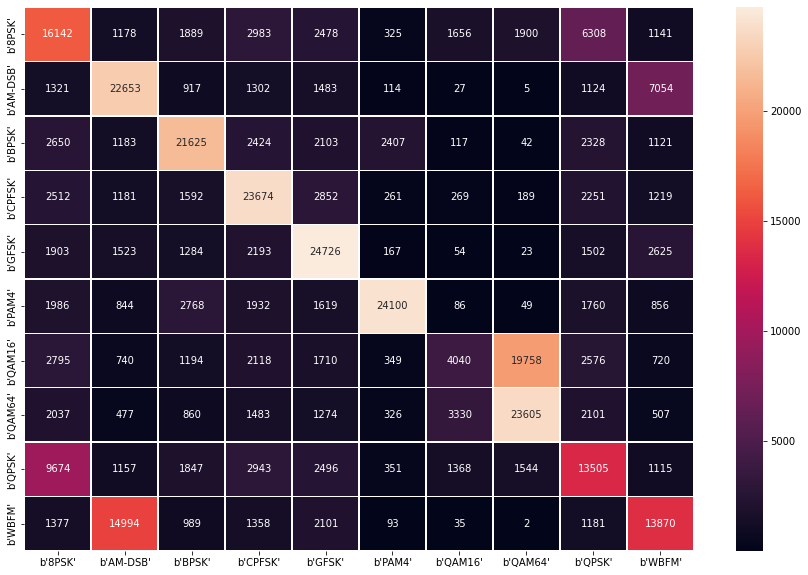

In [ ]:
# get most confusing classes
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
sns.heatmap(confusion_matrix1, annot=True, linewidths=.5, ax=ax, fmt='g')

In [ ]:
# Print f1, precision, and recall scores
print("Percision: ",precision_score(y_test_classes, y_pred_classes , average="macro"))
print("Recall: ",recall_score(y_test_classes, y_pred_classes , average="macro"))
print("F-score: ",f1_score(y_test_classes, y_pred_classes , average="macro"))

Percision:  0.5191220207150733
Recall:  0.5220555555555555
F-score:  0.5093903981142742


In [ ]:
# group by snr
snr_test = [int(snr) for snr in snr_test]
sorted_snrs = np.sort(np.unique(snr_test))
x = []
y = []
for snr in sorted_snrs:
  idx = np.where(snr_test == snr)
  x.append(snr)
  y.append(accuracy_score(np.argmax(y_test_lb[idx], axis = 1), np.argmax(y_predicted[idx], axis = 1)))


In [ ]:
# print results of snr
pd.DataFrame(data = np.array(y).reshape(1, -1) * 100,  columns = sorted_snrs, index = ['accuracy']).round(2)

-20    -18    -16    -14    -12    -10   -8     -6     -4    -2   \
accuracy  10.42  10.86  11.89  13.16  17.23  26.41  37.9  46.67  54.73  61.4   

             0      2      4      6      8      10     12     14     16     18  
accuracy  68.63  73.56  75.31  76.34  76.48  76.69  76.01  76.96  76.59  76.89

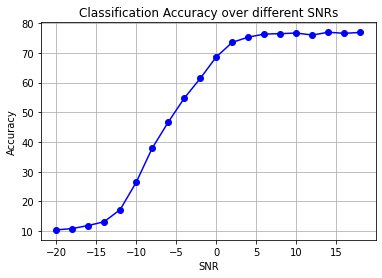

In [ ]:
# plot accuracy vs snr
plt.xlabel('SNR')
plt.ylabel('Accuracy')
plt.title('Classification Accuracy over different SNRs')
plt.plot(x, np.array(y) * 100, 'bo-')
plt.grid(True)